In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Cleaned Cafe Data.csv')

In [2]:
df=df.drop(columns = 'Unnamed: 0')

In [3]:
df['Transaction Date']=pd.to_datetime(df['Transaction Date'])

In [4]:
df['month']=df['Transaction Date'].dt.month_name()

In [5]:
monthly_sales =df.groupby('month')['Total Spent'].sum()

In [6]:
from calendar import month_name
months_order = list(month_name)[1:]

In [7]:
monthly_sales = monthly_sales.reindex(months_order)

In [8]:
item_sales = df.groupby(['Item', 'month'])['Quantity'].sum().reset_index()

In [9]:
item_sales['month']=pd.Categorical(item_sales['month'], categories=months_order, ordered=True)

In [10]:
item_sales=item_sales.sort_values(by='month')

In [11]:
Total_item_sales = df.groupby(['Item', 'month'])['Total Spent'].sum().reset_index()

In [12]:
Total_item_sales['month']=pd.Categorical(item_sales['month'], categories=months_order, ordered=True)

In [13]:
Total_item_sales=Total_item_sales.sort_values(by='month')

In [15]:
item_sales

,Item,month,Quantity
52,Smoothie,January,557.0
64,Tea,January,293.0
4,Coffee,January,301.0
28,Juice,January,660.0
40,Salad,January,325.0
...,...,...,...
62,Tea,December,282.0
38,Salad,December,263.0
26,Juice,December,625.0
14,Cookie,December,274.0


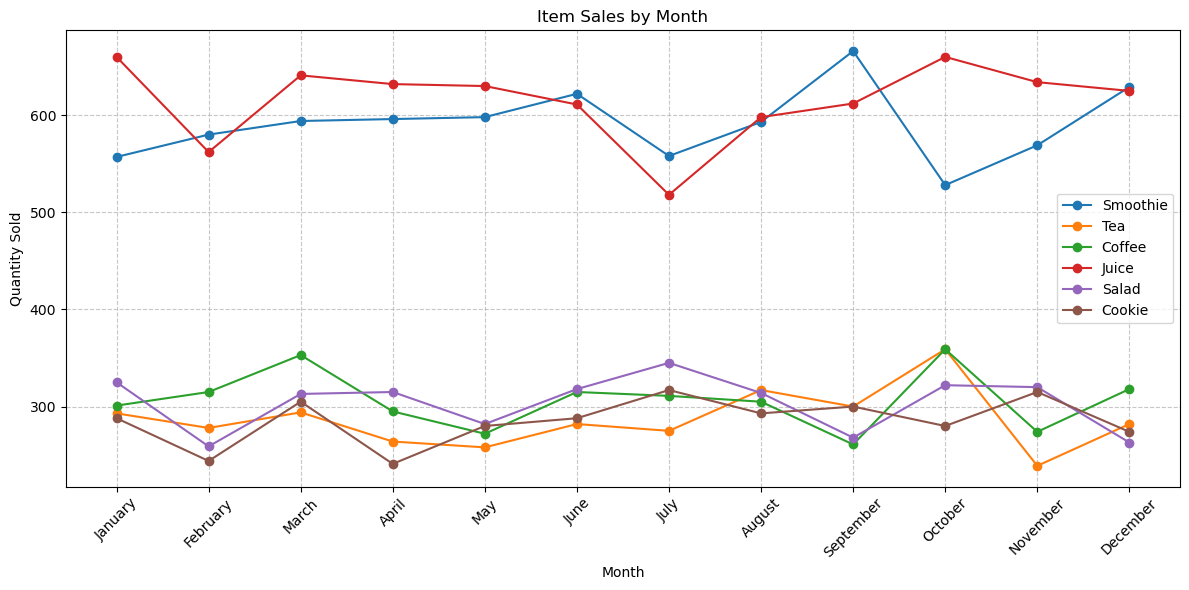

In [16]:
plt.figure(figsize=(12, 6))
# Creates a new figure with width=12 inches and height=6 inches for better visibility

# Group by Item and plot each item's quantities across months
for item in item_sales['Item'].unique():
    # Loops through each unique item in the 'Item' column
    
    data = item_sales[item_sales['Item'] == item]
    # Filters the DataFrame to only include rows for the current item
    
    plt.plot(data['month'], data['Quantity'], marker='o', label=item)
    # Creates a line plot with:
    # - x-axis: month values
    # - y-axis: Quantity values
    # - marker='o': adds circle markers at each data point
    # - label=item: labels the line with the item name for the legend

plt.xlabel('Month')
# Adds a label to the x-axis

plt.ylabel('Quantity Sold')
# Adds a label to the y-axis

plt.title('Item Sales by Month')
# Adds a title to the plot

plt.legend()
# Creates a legend showing which line corresponds to which item

plt.grid(True, linestyle='--', alpha=0.7)
# Adds a grid with dashed lines at 70% opacity for better readability

plt.xticks(rotation=45)
# Rotates the month labels on the x-axis by 45 degrees to prevent overlap

plt.tight_layout()
# Adjusts the plot padding to ensure everything fits without overlapping

plt.show()
# Displays the final plot

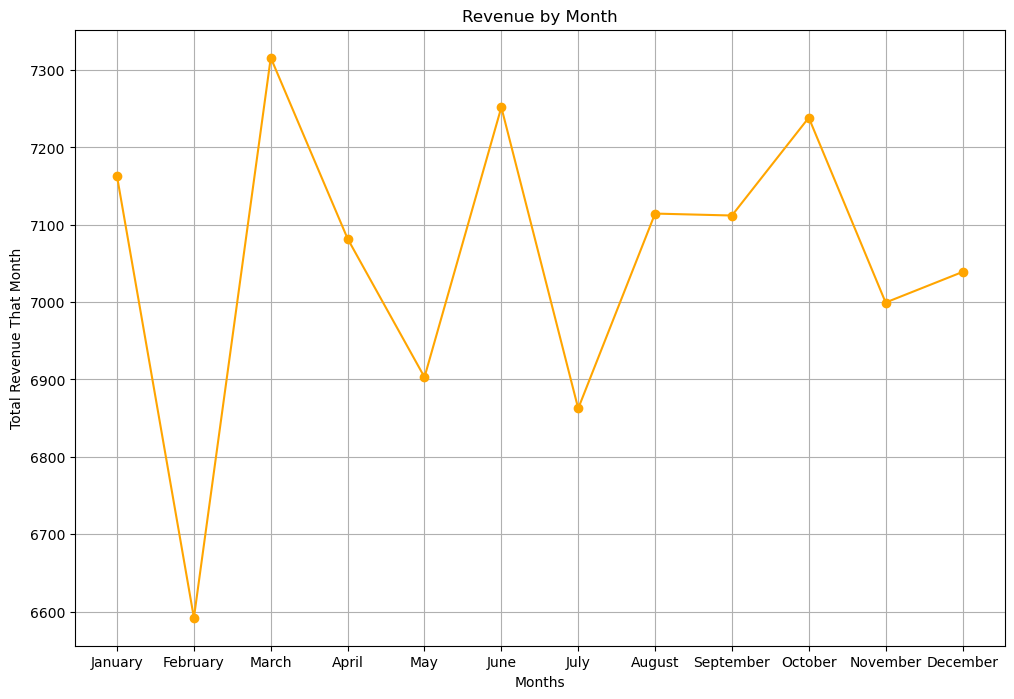

In [17]:
plt.figure(figsize=(12,8))

plt.plot(monthly_sales,marker='o',color='Orange')

plt.xlabel('Months')
plt.ylabel('Total Revenue That Month')

plt.grid(True)
plt.title("Revenue by Month")
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Smoothie'),
  Text(1, 0, 'Juice'),
  Text(2, 0, 'Salad'),
  Text(3, 0, 'Coffee'),
  Text(4, 0, 'Tea'),
  Text(5, 0, 'Cookie')])

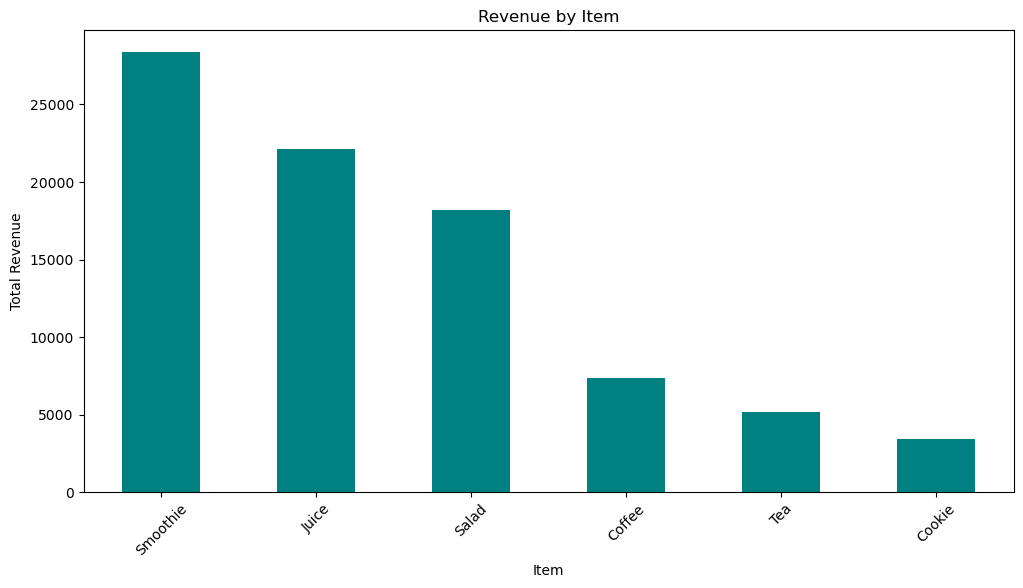

In [18]:
   # Revenue by item
   item_sales = df.groupby('Item')['Total Spent'].sum().sort_values(ascending=False)
   plt.figure(figsize=(12, 6))
   item_sales.plot(kind='bar', color='teal')
   plt.title('Revenue by Item')
   plt.ylabel('Total Revenue')
   plt.xticks(rotation=45)
   

Text(0.5, 1.0, 'Sales Distribution by Item')

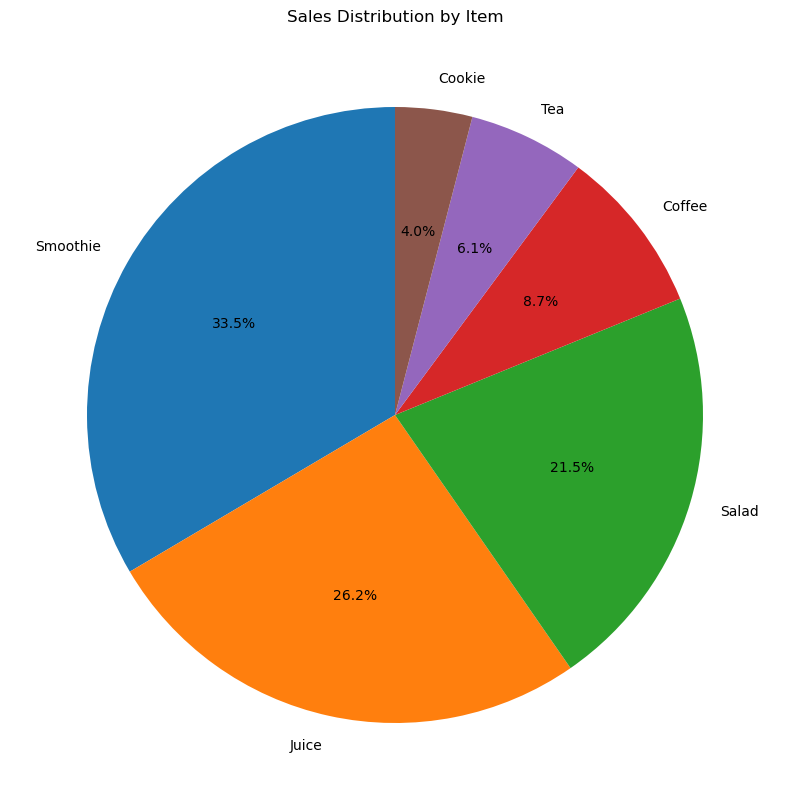

In [24]:
plt.figure(figsize=(10, 10))
plt.pie(item_sales, labels=item_sales.index, autopct='%1.1f%%',startangle=90)
plt.title('Sales Distribution by Item')